In [ ]:
!pip install pandas numpy matplotlib seaborn nltk wordcloud transformers torch scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.6 MB/s eta 0:00:00


In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import files
import io

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print("Please upload your CSV file (e.g., JioMart_reviews.csv):")
uploaded = files.upload()

# Read uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.columns = df.columns.str.strip()  # clean column names


Please upload your CSV file (e.g., JioMart_reviews.csv):


Saving Fast Delivery Agent Reviews.csv to Fast Delivery Agent Reviews.csv


In [ ]:
print(f"✅ Shape: {df.shape} (rows, columns)")

✅ Shape: (5000, 12) (rows, columns)


In [ ]:
print("\nStarting Rows:\n", df.head())


Starting Rows:
   Agent Name  Rating                                        Review Text  \
0      Zepto     4.5  Purpose boy job cup decision girl now get job ...   
1      Zepto     2.1  Prevent production able both the box school wa...   
2    JioMart     4.5  Family station listen agreement more kitchen l...   
3    JioMart     2.6  World north people area everything enter beyon...   
4      Zepto     3.6  Hand way yourself tax whether sister anyone ef...   

   Delivery Time (min)   Location  Order Type Customer Feedback Type  \
0                   58      Delhi  Essentials                Neutral   
1                   25    Lucknow     Grocery               Negative   
2                   54  Ahmedabad  Essentials                Neutral   
3                   22    Chennai  Essentials                Neutral   
4                   34       Pune    Pharmacy               Positive   

  Price Range Discount Applied Product Availability  Customer Service Rating  \
0        High      

In [ ]:
print("\nLast Rows:\n", df.tail())


Last Rows:
      Agent Name  Rating                                        Review Text  \
4995    Blinkit     2.4  Assume president far economic us discuss hand ...   
4996    JioMart     3.2  Chance new edge beyond pass treat laugh woman ...   
4997      Zepto     4.7  Until few population choose value behavior win...   
4998    JioMart     3.8  Fight where recently half enter information ki...   
4999    JioMart     4.5  Agreement challenge boy coach low person these...   

      Delivery Time (min)   Location Order Type Customer Feedback Type  \
4995                   56  Bangalore    Grocery                Neutral   
4996                   45  Hyderabad    Grocery               Negative   
4997                   48       Pune   Pharmacy               Positive   
4998                   11  Bangalore       Food               Negative   
4999                   15       Pune    Grocery                Neutral   

     Price Range Discount Applied Product Availability  \
4995        Hig

In [ ]:
print(f"\nColumns:\n{df.columns.tolist()}")



Columns:
['Agent Name', 'Rating', 'Review Text', 'Delivery Time (min)', 'Location', 'Order Type', 'Customer Feedback Type', 'Price Range', 'Discount Applied', 'Product Availability', 'Customer Service Rating', 'Order Accuracy']


In [ ]:
print(f"\nData Types:\n{df.dtypes}")



Data Types:
Agent Name                  object
Rating                     float64
Review Text                 object
Delivery Time (min)          int64
Location                    object
Order Type                  object
Customer Feedback Type      object
Price Range                 object
Discount Applied            object
Product Availability        object
Customer Service Rating      int64
Order Accuracy              object
dtype: object


In [ ]:
print(f"\n Descriptive Statistics (numeric):\n{df.describe()}")


 Descriptive Statistics (numeric):
           Rating  Delivery Time (min)  Customer Service Rating
count  5000.00000          5000.000000              5000.000000
mean      3.00290            34.962400                 2.972000
std       1.15214            14.789656                 1.409969
min       1.00000            10.000000                 1.000000
25%       2.00000            22.000000                 2.000000
50%       3.00000            35.000000                 3.000000
75%       4.00000            48.000000                 4.000000
max       5.00000            60.000000                 5.000000


In [ ]:
print(f"\n Descriptive Statistics (text):\n{df.describe(include=['object'])}")


 Descriptive Statistics (text):
       Agent Name                                        Review Text Location  \
count        5000                                               5000     5000   
unique          4                                               5000       10   
top         Zepto  Agreement challenge boy coach low person these...  Kolkata   
freq         1282                                                  1      517   

         Order Type Customer Feedback Type Price Range Discount Applied  \
count          5000                   5000        5000             5000   
unique            5                      3           3                2   
top     Electronics               Negative        High              Yes   
freq           1008                   1727        1696             2537   

       Product Availability Order Accuracy  
count                  5000           5000  
unique                    2              2  
top            Out of Stock        Correct  
freq 

In [ ]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Review Text              5000 non-null   object 
 3   Delivery Time (min)      5000 non-null   int64  
 4   Location                 5000 non-null   object 
 5   Order Type               5000 non-null   object 
 6   Customer Feedback Type   5000 non-null   object 
 7   Price Range              5000 non-null   object 
 8   Discount Applied         5000 non-null   object 
 9   Product Availability     5000 non-null   object 
 10  Customer Service Rating  5000 non-null   int64  
 11  Order Accuracy           5000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.1 MB


In [ ]:
num_duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {num_duplicates}")


 Duplicate Rows: 0


In [ ]:
print(f"\nMissing Values:\n{df.isnull().sum()}")


Missing Values:
Agent Name                 0
Rating                     0
Review Text                0
Delivery Time (min)        0
Location                   0
Order Type                 0
Customer Feedback Type     0
Price Range                0
Discount Applied           0
Product Availability       0
Customer Service Rating    0
Order Accuracy             0
dtype: int64


In [ ]:
print("\n Unique Values per Column:")
for col in df.columns:
    print(f"  - {col}: {df[col].nunique()} unique values")



 Unique Values per Column:
  - Agent Name: 4 unique values
  - Rating: 41 unique values
  - Review Text: 5000 unique values
  - Delivery Time (min): 51 unique values
  - Location: 10 unique values
  - Order Type: 5 unique values
  - Customer Feedback Type: 3 unique values
  - Price Range: 3 unique values
  - Discount Applied: 2 unique values
  - Product Availability: 2 unique values
  - Customer Service Rating: 5 unique values
  - Order Accuracy: 2 unique values


In [ ]:
print("\nTop 5 Most Frequent Values per Column:")
for col in df.columns:
    print(f"\n Column: {col}")
    print(df[col].value_counts().head(5))



Top 5 Most Frequent Values per Column:

 Column: Agent Name
Agent Name
Zepto               1282
Blinkit             1272
JioMart             1224
Swiggy Instamart    1222
Name: count, dtype: int64

 Column: Rating
Rating
1.7    148
3.2    143
2.1    141
4.4    140
2.2    138
Name: count, dtype: int64

 Column: Review Text
Review Text
Agreement challenge boy coach low person these exist it eight ago recognize.     1
Purpose boy job cup decision girl now get job yard.                              1
Prevent production able both the box school way issue grow action figure one.    1
Family station listen agreement more kitchen lose hour hour.                     1
World north people area everything enter beyond Democrat beautiful very.         1
Name: count, dtype: int64

 Column: Delivery Time (min)
Delivery Time (min)
47    117
60    116
10    112
53    111
23    110
Name: count, dtype: int64

 Column: Location
Location
Kolkata      517
Ahmedabad    515
Pune         515
Delhi        514


In [ ]:
total_missing = df.isnull().sum().sum()
print(f" Total missing values in DataFrame: {total_missing}")

 Total missing values in DataFrame: 0


In [ ]:
df.dropna( inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['cleaned_review'] = df['Review Text'].apply(clean_text)

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df['cleaned_review'] = df['Review Text'].apply(remove_stopwords)

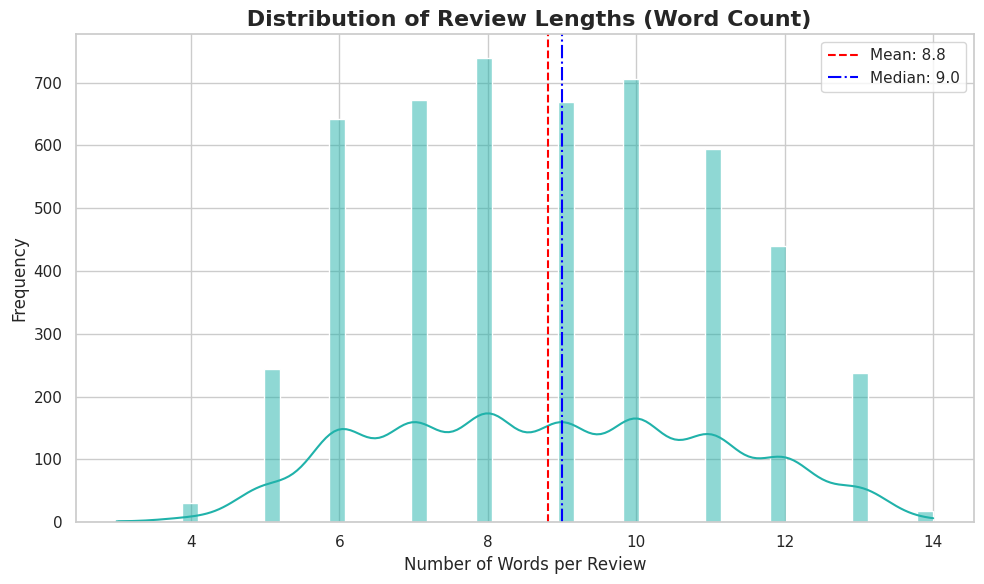

In [ ]:

sns.set_theme(style="whitegrid")

mean_len = df['review_length'].mean()
median_len = df['review_length'].median()

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='lightseagreen', edgecolor='white')

plt.axvline(mean_len, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_len:.1f}')
plt.axvline(median_len, color='blue', linestyle='-.', linewidth=1.5, label=f'Median: {median_len:.1f}')

# Titles and labels with a more appealing font size
plt.title(' Distribution of Review Lengths (Word Count)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words per Review', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Annotate
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-50-882634042>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


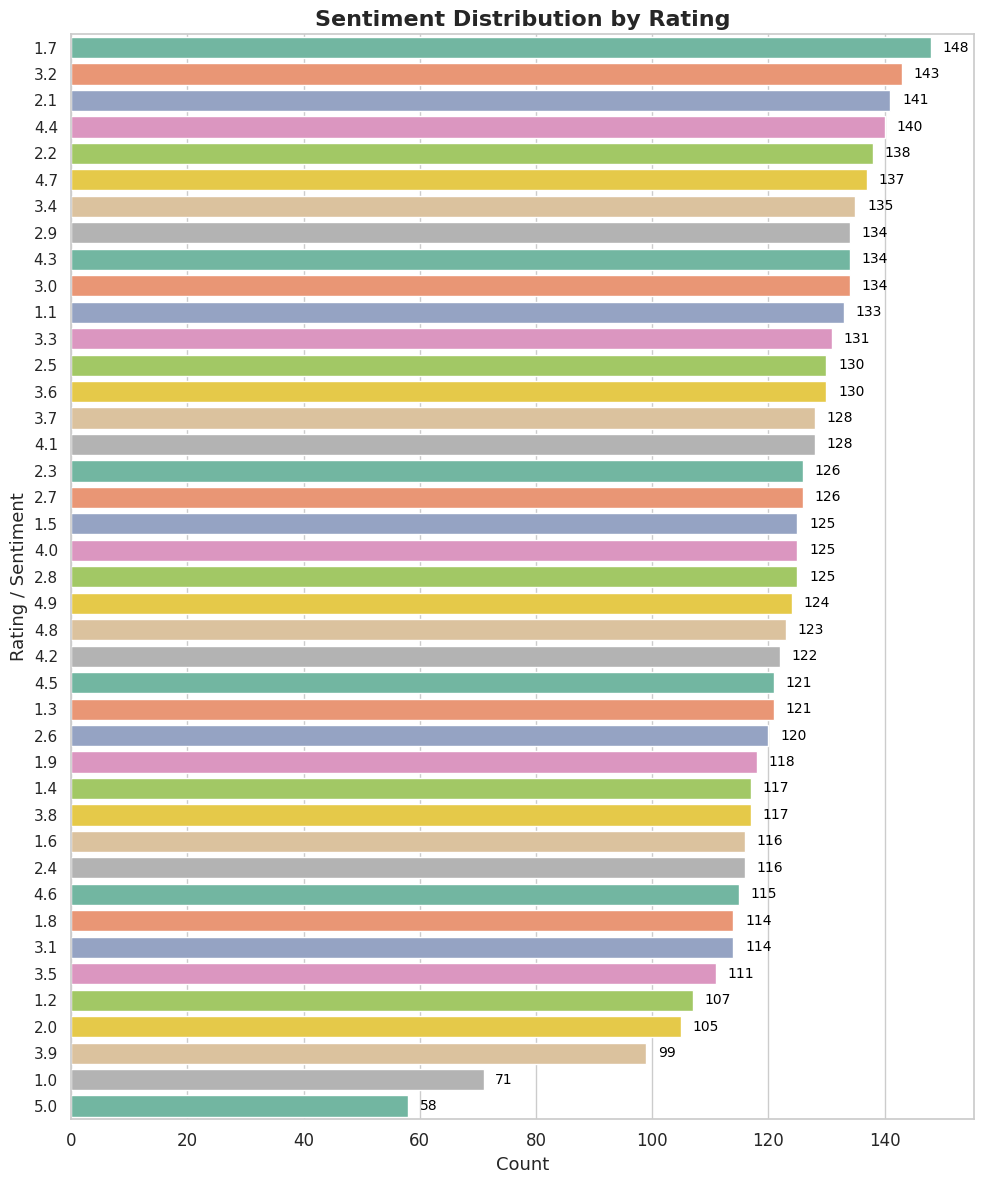

In [ ]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 12))

ax = sns.countplot(
    data=df,
    y='Rating',
    palette='Set2',
    order=df['Rating'].value_counts().index
)

for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(f'{count}',
                (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                va='center', fontsize=10, color='black')


plt.title('Sentiment Distribution by Rating', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=13)
plt.ylabel('Rating / Sentiment', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(corpus, n=2, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

    x, y = zip(*words_freq)

    plt.figure(figsize=(10,5))
    sns.barplot(x=y, y=x, palette="viridis")
    plt.title(f'Top {top_k} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()


<ipython-input-53-164818265>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette="viridis")


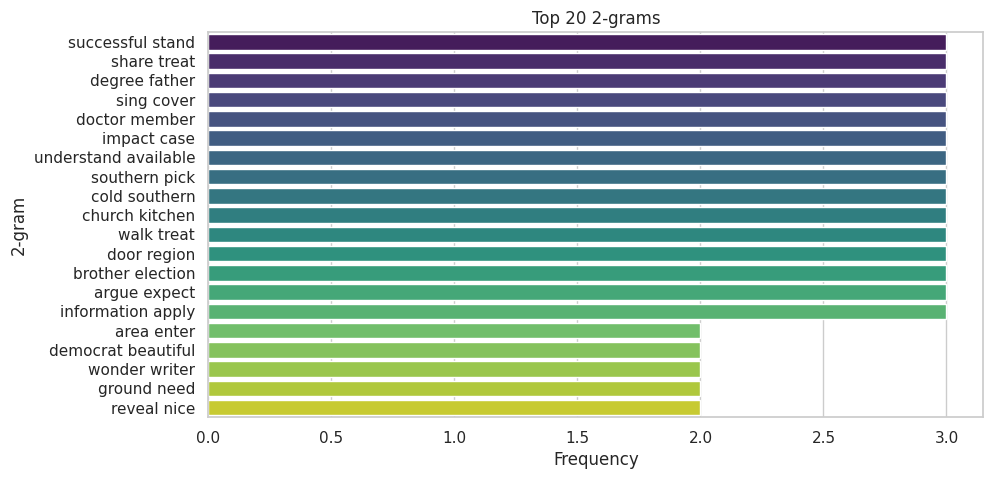

<ipython-input-53-164818265>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette="viridis")


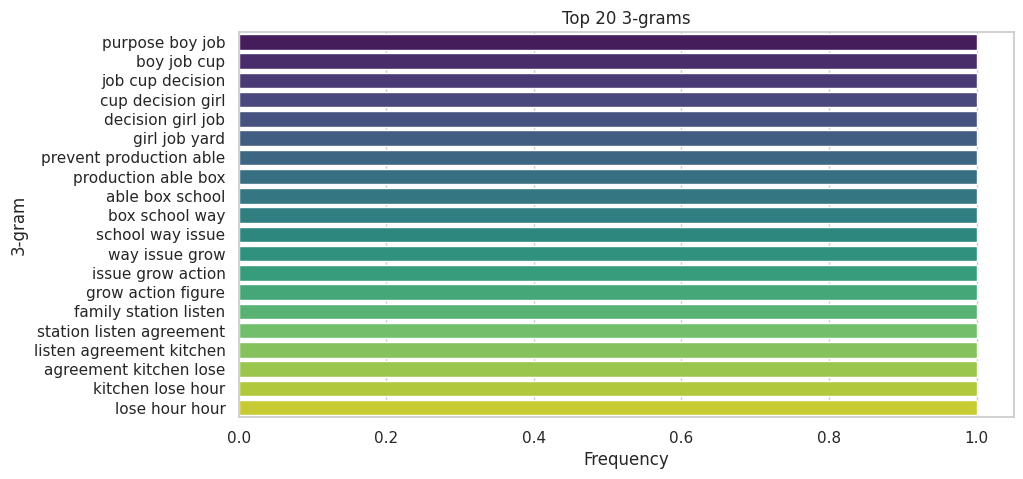

In [ ]:
plot_ngrams(df['cleaned_review'], n=2, top_k=20)  # Bigrams
plot_ngrams(df['cleaned_review'], n=3, top_k=20)  # Trigrams


In [ ]:
pip install transformers datasets scikit-learn torch


In [80]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, get_scheduler  # 🔁 CHANGED: DistilBERT
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from sklearn.metrics import accuracy_score
from google.colab import files
import io


In [81]:
#  Upload CSV
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

#  Required columns
required_cols = ['Review Text', 'Customer Feedback Type']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing column: {col}")

#  Clean and validate
df['Review Text'] = df['Review Text'].astype(str).str.strip()
df['Customer Feedback Type'] = df['Customer Feedback Type'].astype(str).str.lower().str.strip()

label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df = df[df['Customer Feedback Type'].isin(label_map) & df['Review Text'].notnull()]
df['label'] = df['Customer Feedback Type'].map(label_map)

if df.empty:
    raise ValueError("Filtered dataset is empty.")


Saving Fast Delivery Agent Reviews.csv to Fast Delivery Agent Reviews (6).csv


In [83]:
#  Train/val split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Review Text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

#  Tokenize using DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=64)


In [84]:
#  Dataset
class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

#  DataLoaders
train_dataset = ReviewDataset(train_encodings, train_labels)
val_dataset = ReviewDataset(val_encodings, val_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

#  Model & training setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
model.to(device)

optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(train_loader) * 2
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
# Evaluation function
def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    preds, targets = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            output = model(**batch)
            total_loss += output.loss.item()
            preds.extend(output.logits.argmax(dim=1).cpu().numpy())
            targets.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(targets, preds)
    avg_loss = total_loss / len(dataloader)
    return avg_loss, acc


In [86]:
# Training loop (2 epochs, patience=1)
def train_model(epochs=2, patience=1):
    best_loss = float("inf")
    wait = 0

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        total_loss = 0
        train_preds, train_labels = [], []

        for batch in train_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            model.zero_grad()
            output = model(**batch)
            loss = output.loss
            loss.backward()
            optimizer.step()
            scheduler.step()

            total_loss += loss.item()
            train_preds.extend(output.logits.argmax(dim=1).cpu().numpy())
            train_labels.extend(batch["labels"].cpu().numpy())

        train_acc = accuracy_score(train_labels, train_preds)
        val_loss, val_acc = evaluate(model, val_loader)

        print(f"Train Loss: {total_loss/len(train_loader):.4f}, Acc: {train_acc:.4f}")
        print(f"Val   Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

        if val_loss < best_loss:
            best_loss = val_loss
            wait = 0
            torch.save(model.state_dict(), "best_model.pt")
        else:
            wait += 1
            if wait >= patience:
                print("Early stopping triggered.")
                break

train_model()


Epoch 1/2
Train Loss: 1.1010, Acc: 0.3375
Val   Loss: 1.1075, Acc: 0.3120

Epoch 2/2
Train Loss: 1.0977, Acc: 0.3553
Val   Loss: 1.1024, Acc: 0.3160


In [90]:
# Load the best model checkpoint before evaluation
model.load_state_dict(torch.load("best_model.pt"))
model.eval()

# You can change this to any other dataloader if needed (e.g., test_loader)
eval_loader = val_loader

all_preds = []
all_labels = []
misclassified_samples = []

with torch.no_grad():
    for batch in eval_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        for i in range(len(labels)):
            if preds[i] != labels[i]:
                misclassified_samples.append({
                    "input_ids": input_ids[i].cpu(),
                    "true_label": labels[i].item(),
                    "predicted_label": preds[i].item()
                })

Classification Report:
              precision    recall  f1-score   support

    Negative       0.31      1.00      0.48       312
     Neutral       0.50      0.00      0.01       328
    Positive       0.67      0.01      0.02       360

    accuracy                           0.32      1000
   macro avg       0.49      0.34      0.17      1000
weighted avg       0.50      0.32      0.16      1000



<Figure size 600x600 with 0 Axes>

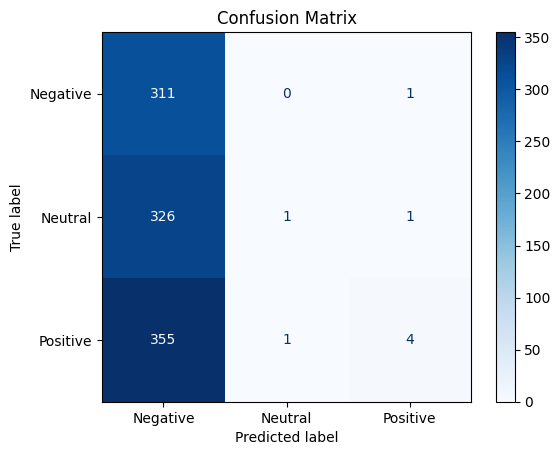


 Misclassified Examples:
Text: case from reach suffer hour bring management trade.
True Label: 1 | Predicted: 0
------------------------------------------------------------
Text: here agent together into anything agreement without religious institution move something throughout.
True Label: 1 | Predicted: 0
------------------------------------------------------------
Text: age support summer use send manage anything time.
True Label: 2 | Predicted: 0
------------------------------------------------------------
Text: citizen health better gas measure wall mrs parent boy color work.
True Label: 1 | Predicted: 0
------------------------------------------------------------
Text: same professional kind sense fish soldier minute challenge peace bank election certain.
True Label: 1 | Predicted: 0
------------------------------------------------------------


In [93]:

#  Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=['Negative', 'Neutral', 'Positive']))

#  Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  Misclassified Example Review
print("\n Misclassified Examples:")
for item in misclassified_samples[:5]:  # show only first 5
    decoded_input = tokenizer.decode(item["input_ids"], skip_special_tokens=True)
    print(f"Text: {decoded_input}")
    print(f"True Label: {item['true_label']} | Predicted: {item['predicted_label']}")
    print("-" * 60)


In [100]:
all_preds = []
all_labels = []
all_logits = []  # NEW: store logits
misclassified_samples = []

with torch.no_grad():
    for batch in eval_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_logits.extend(logits.cpu().numpy())  # <- NEW

        for i in range(len(labels)):
            if preds[i] != labels[i]:
                misclassified_samples.append({
                    "input_ids": input_ids[i].cpu(),
                    "true_label": labels[i].item(),
                    "predicted_label": preds[i].item()
                })


<ipython-input-101-434455300>:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  preds_prob = torch.nn.functional.softmax(torch.tensor(all_logits), dim=1).numpy()


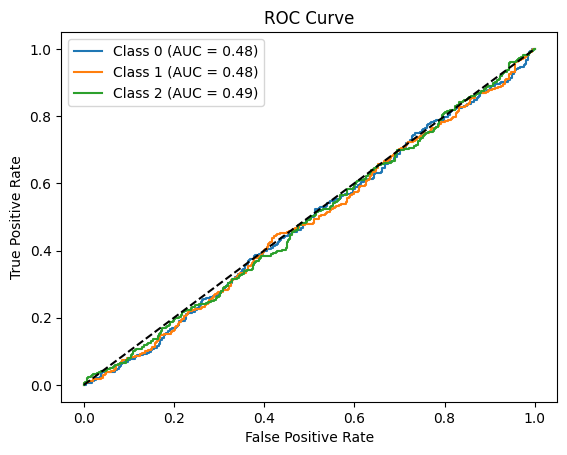

In [101]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

labels_bin = label_binarize(all_labels, classes=[0, 1, 2])
preds_prob = torch.nn.functional.softmax(torch.tensor(all_logits), dim=1).numpy()

for i in range(3):  # for each class
    fpr, tpr, _ = roc_curve(labels_bin[:, i], preds_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


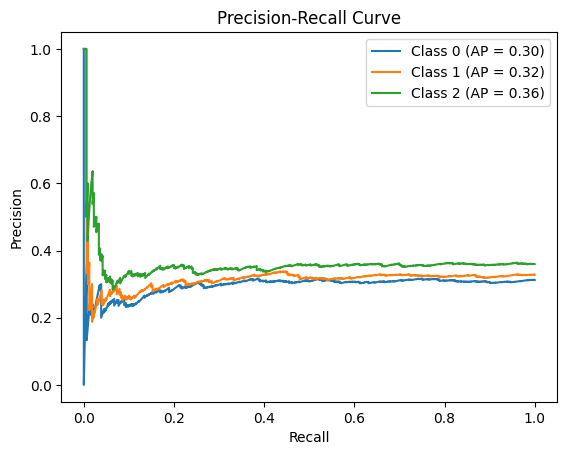

In [102]:
from sklearn.metrics import precision_recall_curve, average_precision_score

for i in range(3):  # one curve per class
    precision, recall, _ = precision_recall_curve(labels_bin[:, i], preds_prob[:, i])
    ap_score = average_precision_score(labels_bin[:, i], preds_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {ap_score:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


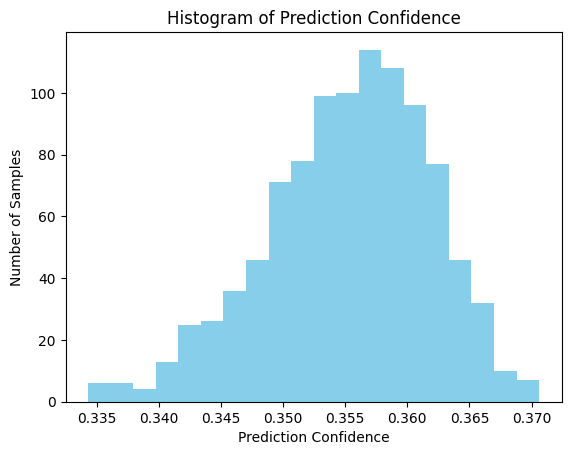

In [103]:
confidence_scores = np.max(preds_prob, axis=1)
plt.hist(confidence_scores, bins=20, color='skyblue')
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Samples")
plt.title("Histogram of Prediction Confidence")
plt.show()
